# Time Series Forecasting Population Dynamics of Chitala Fish from Catch Data in Diamond Harbour site using Machine Learning Techniques.

First we need to install required packages :
    * pip install tensorflow==1.13.1
    * pip install keras==2.3.1
    * pip install sklearn

Import all required libraries in notebook using following codes:

In [2]:
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
 

In this study, we have developed different Long Short-Term Memory (LSTM) models which are basically deep network architectures were tested for forecasting populations of Chitala Fish in Diamond Harbour. An approach was proposed to capture the temporal evolution of the population of Chitala based on the time series that model the size of population information. LSTM model is a type of recurrent neural network capable of learning order dependence in sequence prediction problems. The structure allows RNN to retain temporal relationships by creating an association between the current time-step and previous time-step The approach showed significant performance and has proven to be able to forecast population size in coming years. We have used bootstrap procedure to resample the original data a number of times and calculated the statistic of interest.

We have imported LSTM function from Keras package. Since our data is continuous, root mean squared error was used which allows us conducting a selection of best models for each site.

## Conv LSTM

In [2]:
from numpy import array
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [4]:
    for w in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet1')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        n_step1 = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_step1)
        # reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
        n_features = 1
        n_seq = 2
        n_step2 = int(n_step1/2)
        X = X.reshape((X.shape[0], n_seq, 1, n_step2, n_features))
        # define model
        model = Sequential()
        model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_step2, n_features)))
        model.add(Flatten())
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=500, verbose=0)
        # demonstrate prediction

        x_input, y_input = split_sequence(test_data.Value, n_step1)

        x_input = x_input.reshape((x_input.shape[0], n_seq,1, n_step2, n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
    
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta

       
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl})
result.to_csv('Convlstm_DH.csv', index=None)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
RMSE 2.7962532712678425
Confidence Interval : 2.495038163433379 17.125940311183626
RMSE 2.352426378863938
Confidence Interval : 5.935447529477742 15.813937350588176
RMSE 2.9636761455794054
Confidence Interval : 3.0201588089969187 18.139282483289
RMSE 2.8563032853887007
Confidence Interval : 3.4689807615465904 17.546470669727825
RMSE 2.300108400772172
Confidence Interval : 2.3617780056718267 18.403322294640216
RMSE 3.0893320208658337
Confidence Interval : 4.646395711132184 19.189709158710343
RMSE 2.8894164094350896
Confidence Interval : 2.556142320182735 18.05757624909598
RMSE 3.235506666655344
Confidence Interval : 0.6843370777089319 17.815278710750846
RMSE 2.9588498676699464
Confidence Interval : 4.929649626619102 17.34598728477311
RMSE 2.233313903428874
Confidence Interval : 5.3287667510667305 16.869813752397015
RMSE 2.1475862082054253
Confidence Interval : 2.717082

## Vanilla LSTM

In [3]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Embedding
import numpy as np
import pandas as pd
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [5]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet1')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))

        # choose a number of time steps
        n_steps = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_steps)

        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()

        model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
        model.add(Dense(1))
        
        # compile model
        model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        # fit model

        history=model.fit(X, y, epochs=200, verbose=0)
        
        # split into samples
        x_input, y_input = split_sequence(test_data.Value, n_steps)

        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
       
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta

        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl})
result.to_csv('Vanillalstm_DH.csv', index=None)

RMSE 3.472241992607928
Confidence Interval : 7.9483130448313934 17.841675609169023
RMSE 4.082039237489763
Confidence Interval : 7.380783185214519 19.881831473686148
RMSE 4.504442113736922
Confidence Interval : 8.596670544523157 19.62190779409989
RMSE 3.264917739867581
Confidence Interval : 7.900203954822884 17.39795305593674
RMSE 4.4614698782814886
Confidence Interval : 7.542825559202589 20.31559304169724
RMSE 3.976784696217677
Confidence Interval : 7.179483706721111 19.919209732217574
RMSE 4.4722317300405985
Confidence Interval : 8.200612982462136 19.988088647176536
RMSE 2.766055339599797
Confidence Interval : 8.18714983695969 15.493073083049374
RMSE 2.2523605477274575
Confidence Interval : 7.084931096033126 15.713245533169577
RMSE 3.601814429128633
Confidence Interval : 8.285834637076043 17.939914242492872
RMSE 4.576969764178636
Confidence Interval : 9.399027332476276 18.784502930062086
RMSE 4.0007555487536
Confidence Interval : 8.367361264271224 18.800751899268114
RMSE 2.04752078743

## Stacked LSTM

In [4]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [5]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet1')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        n_steps = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_steps)
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()
        model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
        model.add(LSTM(50, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=200, verbose=0)
        # demonstrate prediction
        # split into samples
        x_input, y_input = split_sequence(test_data.Value, n_steps)

        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
      
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta


        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl})
result.to_csv('Stackedlstm_DH.csv', index=None)

RMSE 3.199566288189492
Confidence Interval : 8.99864094426089 15.788027015769801
RMSE 4.116299654134223
Confidence Interval : 9.314490881256665 18.256222434434598
RMSE 4.196213719967288
Confidence Interval : 9.799608119125613 17.74693282238527
RMSE 3.9704485666718328
Confidence Interval : 8.89904330585258 18.118137273196666
RMSE 3.157056448170431
Confidence Interval : 7.9500243672445965 16.808988944958948
RMSE 3.412045749636554
Confidence Interval : 7.067829187746907 18.823763382966682
RMSE 4.339931723639437
Confidence Interval : 8.706801676777467 19.11088358672002
RMSE 3.9822855950180536
Confidence Interval : 8.201815417732199 18.694596205541377
RMSE 3.3721196586020437
Confidence Interval : 8.557673512373704 17.05462463564527
RMSE 3.0410459680196307
Confidence Interval : 8.378650251634467 15.80339173401355
RMSE 2.7707316302877185
Confidence Interval : 6.408556215591761 15.792411981822092
RMSE 1.8956854508629517
Confidence Interval : 6.255983726168204 13.704113859237417
RMSE 1.78178234

## Bidirectional LSTM

In [5]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [5]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet1')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        n_steps = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_steps)
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()
        model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=200, verbose=0)
        # demonstrate prediction

        x_input, y_input = split_sequence(test_data.Value, n_steps)

        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

         #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
       
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta


        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl})
result.to_csv('Bidirectional_DH.csv', index=None)

RMSE 2.699693690953155
Confidence Interval : 8.37539890954038 15.00391769289405
RMSE 2.3715945760214545
Confidence Interval : 7.432614438671127 13.037442367620724
RMSE 3.3295887553828245
Confidence Interval : 9.060746074352265 16.205260122895922
RMSE 2.1043205736413593
Confidence Interval : 6.6804858479904405 13.81399632865402
RMSE 3.807149282704429
Confidence Interval : 5.302866985476083 14.146399448239737
RMSE 3.2702537082309284
Confidence Interval : 8.962956834614692 16.143897195449483
RMSE 2.713194743135008
Confidence Interval : 8.479017939008454 14.772903033543162
RMSE 2.9957621506452705
Confidence Interval : 7.618715215665586 16.618285658445043
RMSE 2.3247462707950772
Confidence Interval : 7.688633044964313 13.892120008973325
RMSE 3.5197510777438232
Confidence Interval : 9.099337856996671 16.7335961138634
RMSE 2.7466092792969286
Confidence Interval : 6.48542716934714 15.856049271082547
RMSE 3.086401269152246
Confidence Interval : 7.378595460080826 14.257135555805752
RMSE 3.041091

## CNN LSTM

In [6]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [4]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet1')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        
        
        n_step1 = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_step1)
        # reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
        n_features = 1
        n_seq = 2
        n_step2 = int(n_step1/2)
        X = X.reshape((X.shape[0], n_seq, n_step2, n_features))
        # define model
        model = Sequential()
        model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_step2, n_features)))
        model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
        model.add(TimeDistributed(Flatten()))
        model.add(LSTM(50, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=500, verbose=0)
        # demonstrate prediction
        x_input, y_input = split_sequence(test_data.Value, n_step1)

        x_input = x_input.reshape((x_input.shape[0], n_seq, n_step2, n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
      
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta


        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl,'nsteps':nsteps})
result.to_csv('CNN_DH.csv', index=None)

RMSE 3.5028226139631267
Confidence Interval : 7.778703425591587 15.409676100546719
RMSE 3.4445124953175745
Confidence Interval : 7.806925267273519 14.869135409301187
RMSE 4.874694381427188
Confidence Interval : 2.4256606644228906 13.069902485029319
RMSE 3.380542169233018
Confidence Interval : 6.925213903045782 13.828459888839593
RMSE 2.902279541777392
Confidence Interval : 7.538833871656964 12.318756565278461
RMSE 3.0676000893979216
Confidence Interval : 5.954452611144028 12.326438449685135
RMSE 2.62512607806063
Confidence Interval : 7.8425193885330025 12.906363382005328
RMSE 3.403656988288989
Confidence Interval : 9.052703385749215 15.059794182381278
RMSE 3.4694989704421086
Confidence Interval : 6.329677839401429 13.936633925315673
RMSE 3.139893882516292
Confidence Interval : 8.364163202126356 14.143128591696886
RMSE 3.501184622007245
Confidence Interval : 6.0871747991107235 13.913146708343195
RMSE 3.072427190145605
Confidence Interval : 5.32059468111807 13.230971562053622
RMSE 3.5268

In [2]:
# Creating a dataframe
import pandas as pd
Models=['Convlstm_DH','Vanillalstm_DH','Stackedlstm_DH','Bidirectional_DH','CNN_DH']
Modelss=['Conv LSTM','Vanilla LSTM','Stacked LSTM','Bidirectional LSTM','CNN LSTM']

Model=[]
values=[]
for i in range(5):
    h=pd.read_csv(Models[i]+'.csv')
    for j in range(len(h)):
        values.append(h['RMSE'][j])
        Model.append(Modelss[i])
        

In [3]:
data = pd.DataFrame({'Models':Model,'RMSE':values})
data

,Models,RMSE
0,Conv LSTM,2.796253
1,Conv LSTM,2.352426
2,Conv LSTM,2.963676
3,Conv LSTM,2.856303
4,Conv LSTM,2.300108
...,...,...
95,CNN LSTM,3.188964
96,CNN LSTM,3.601553
97,CNN LSTM,4.237220
98,CNN LSTM,3.915501


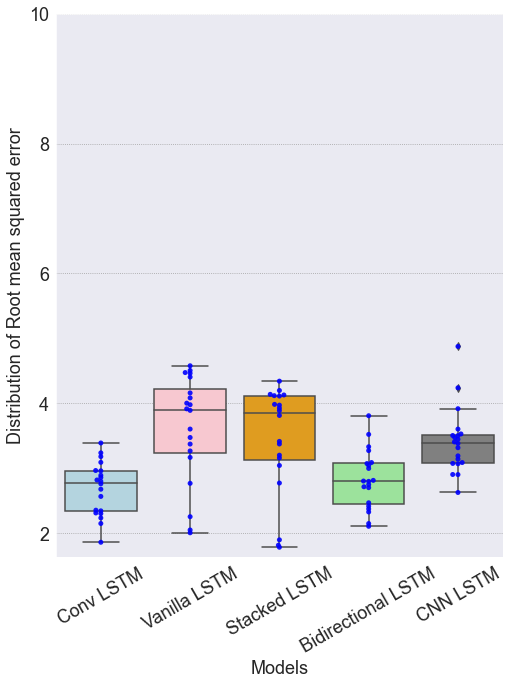

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

plt.figure(figsize=(8,10))

sns.boxplot("Models", "RMSE", data=data,
               palette=["lightblue", "pink", "orange","lightgreen","grey"])
sns.swarmplot("Models", "RMSE", data=data, palette=["blue", "blue", "blue","blue","blue"], alpha=0.9)

plt.ylabel("Distribution of Root mean squared error",fontsize=18)

plt.xlabel("Models",fontsize=18)
plt.xticks(fontsize=18, rotation=30)
plt.yticks([2,4,6,8,10],fontsize=18)
plt.savefig('Boxplot_lstm_DH.jpeg',dpi=400)
plt.show()